In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ad_df=pd.read_csv("Advertising.csv")

In [3]:
ad_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
ad_df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
ad_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
x=ad_df.iloc[:,0]
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
5        8.7
6       57.5
7      120.2
8        8.6
9      199.8
10      66.1
11     214.7
12      23.8
13      97.5
14     204.1
15     195.4
16      67.8
17     281.4
18      69.2
19     147.3
20     218.4
21     237.4
22      13.2
23     228.3
24      62.3
25     262.9
26     142.9
27     240.1
28     248.8
29      70.6
       ...  
170     50.0
171    164.5
172     19.6
173    168.4
174    222.4
175    276.9
176    248.4
177    170.2
178    276.7
179    165.6
180    156.6
181    218.5
182     56.2
183    287.6
184    253.8
185    205.0
186    139.5
187    191.1
188    286.0
189     18.7
190     39.5
191     75.5
192     17.2
193    166.8
194    149.7
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [10]:
x=ad_df.iloc[:,0:3].values
#print(x)
y=ad_df.iloc[:,3:].values.reshape(-1,1)
#y=ad_df["sales"].values
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


In [18]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

In [19]:
lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_predi=lin.predict(x)
y_predi

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872],
       [ 7.0322992 ],
       [17.28512918],
       [10.57712073],
       [ 8.82630048],
       [18.43436638],
       [20.81929952],
       [12.82365674],
       [23.22495716],
       [ 9.95168206],
       [14.16607293],
       [18.10076728],
       [14.7405382 ],
       [ 6.4891503 ],
       [16.5459329 ],
       [ 8.14651887],
       [15.6100386 ],
       [14.98951429],
       [17.05167344],
       [19.41053803],
       [ 9.14402389],
       [21.6339338 ],
       [11.3460929 ],
       [ 7.63888314],
       [18.86426829],
       [ 7.57483051],
       [17.00682618],
       [23.40590052],
       [15.62347779],
       [ 9.90868103],
       [20.44761039],
       [16.37766467],
       [17.2959832 ],
       [21.59580326],
       [13.96385684],
       [ 8.88787996],
       [15

In [21]:
lin.predict([[180.8,10.8,58.4]])

array([[13.18867186]])

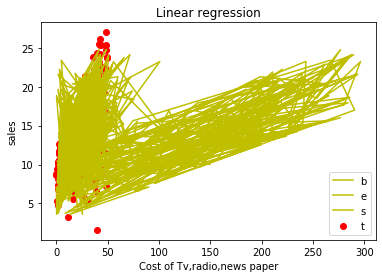

In [24]:
plt.scatter(ad_df["radio"],y,c='r',label="Before predictions")
plt.plot(x,y_predi,c='y',label="After prediction with Linearregression")
plt.xlabel("Cost of Tv,radio,news paper")
plt.ylabel("sales")
plt.title("Linear regression")
plt.legend("best")
plt.show()

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat=PolynomialFeatures()

In [38]:
x_poly=poly_feat.fit_transform(x)
poly_feat.fit(x_poly,y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [39]:
lin.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_predictions=lin.predict(x_poly)

In [41]:
lin.coef_

array([[ 0.00000000e+00,  5.16525487e-02,  2.10742970e-02,
         6.88373531e-03, -1.09702663e-04,  1.10525949e-03,
        -4.55155391e-05,  1.11997015e-04,  8.26605896e-05,
         1.19125650e-05]])

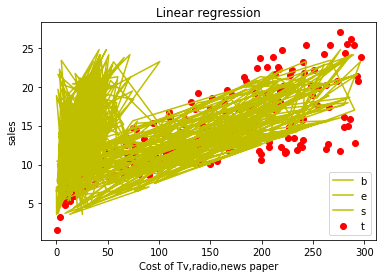

In [42]:
plt.scatter(ad_df["TV"],y,c='r',label="Before predictions")
plt.plot(x,y_predi,c='y',label="After prediction with Linearregression")
plt.xlabel("Cost of Tv,radio,news paper")
plt.ylabel("sales")
plt.title("Linear regression")
plt.legend("best")
plt.show()

### Ridge regression(Tikhonov regularization)

## Ridge regression:
### 1.ridge regression:over fitting--(alpha=0<alpha<infinity)
### 2.lasso regression:under fitting  # regularization regression

In [46]:
from sklearn.linear_model import Ridge

In [47]:
r=Ridge()

In [56]:
x2=5*np.random.rand(100,1)
y2=0.5*X2+np.random.randn(100,1)
x2.shape
print("x2",x2)
print("y2",y2)

x2 [[1.61167588]
 [2.71605567]
 [0.18750641]
 [4.62537762]
 [0.33703033]
 [1.20422794]
 [2.48200747]
 [0.02142395]
 [1.1385931 ]
 [1.28603253]
 [3.87918039]
 [4.9203981 ]
 [0.99657591]
 [0.04927072]
 [4.19098294]
 [1.36152302]
 [4.66381646]
 [3.31646921]
 [3.74612212]
 [4.45739205]
 [2.12233079]
 [4.25833964]
 [0.13591387]
 [2.49786833]
 [2.54797646]
 [2.87690713]
 [2.89318779]
 [1.8870526 ]
 [3.43178265]
 [1.30094027]
 [0.10814375]
 [0.46840323]
 [0.48933248]
 [2.42990656]
 [4.28043722]
 [3.75519107]
 [3.31611889]
 [4.47039981]
 [0.87871785]
 [0.45182002]
 [2.288815  ]
 [3.93702423]
 [4.26651552]
 [0.26942944]
 [3.65743932]
 [3.50515727]
 [4.85803847]
 [2.8574159 ]
 [2.76677359]
 [3.75746539]
 [1.64663949]
 [0.14695316]
 [2.59611292]
 [0.16316185]
 [1.18163044]
 [1.52379969]
 [3.59924206]
 [2.10636712]
 [0.4591715 ]
 [0.8856506 ]
 [2.19791866]
 [2.01913046]
 [3.25900738]
 [1.51923098]
 [3.78067479]
 [4.84858806]
 [4.815756  ]
 [4.37097266]
 [4.45425682]
 [1.86165252]
 [1.35612889]
 [0

In [57]:
y2.shape

(100, 1)

In [58]:
r=Ridge(alpha=1,solver="Cholesky")
r

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='Cholesky', tol=0.001)

### solver;{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}

#### Solver to use in the computational routines:

#### ‘auto’ chooses the solver automatically based on the type of data.

#### ‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients. More stable for singular matrices than ‘cholesky’.

#### ‘cholesky’ uses the standard scipy.linalg solve function to obtain a closed-form solution.

#### ‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).

#### ‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.

#### ‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large.

In [59]:
y2.shape

(100, 1)

In [60]:
r=Ridge(alpha=1,solver="cholesky")
r

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [61]:
r.fit(x2,y2)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [62]:
r.predict([[0.89]])

array([[0.66935258]])